In [103]:
import db
import db_twetext
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import re
import pickle

# Getting info from SQLite tweets

Total Positive tweets

In [158]:
len(db.orm.select(t for t in db.Tweet if t.sentiment is 1))

26586

Total Negative tweets

In [159]:
len(db.orm.select(t for t in db.Tweet if t.sentiment is 0))

24183

In [104]:
tweets=list(db.orm.select(t for t in db.Tweet))

In [105]:
text_L=list(i.text for i in tweets)
sentiment_L =list(i.sentiment for i in tweets)

In [106]:
df = pd.DataFrame({
    "Text": text_L,
    "Sentiment": sentiment_L
})

In [107]:
np.random.seed(1337)
msk = np.random.rand(len(df)) < 0.8
print(len(df[msk]),
len(df[~msk]))

40460 10309


# Splitting in train and test

In [108]:
df_train = df[msk]
df_test = df[~msk]

# No Tunning Study

I am using a manual search to find the best parameters based on the train and test dataset

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(df_train['Text'])
X = cv.transform(df_train['Text'])
X_test = cv.transform(df_test['Text'])

In [110]:
X_train, X_val, y_train, y_val = train_test_split(
    X, df_train['Sentiment'], train_size = 0.75
)

/home/nikolas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [111]:
C1=[]
score_v=[]
print("\t"*3+"VALIDATION:\n")
for c in (10**exp for exp in range(-10, 10)):
#for c in np.linspace(0.0000000000001,1,20):
    lr=LogisticRegression(C=c)
    lr.fit(X_train,y_train)
    print ("C={:.5f}:\t\t{:.5f}".format
           (c,accuracy_score(y_val, lr.predict(X_val))))
    C1.append(c)
    score_v.append(accuracy_score(y_val, lr.predict(X_val)))

			VALIDATION:

C=0.00000:		0.58438
C=0.00000:		0.58428
C=0.00000:		0.58438
C=0.00000:		0.58428
C=0.00000:		0.58468
C=0.00001:		0.59090
C=0.00010:		0.62847
C=0.00100:		0.67217
C=0.01000:		0.72447
C=0.10000:		0.76174
C=1.00000:		0.76589
C=10.00000:		0.75353
C=100.00000:		0.73020
C=1000.00000:		0.69619
C=10000.00000:		0.67088
C=100000.00000:		0.66288
C=1000000.00000:		0.65645
C=10000000.00000:		0.65714
C=100000000.00000:		0.65418
C=1000000000.00000:		0.65665


In [112]:
len(C1)

20

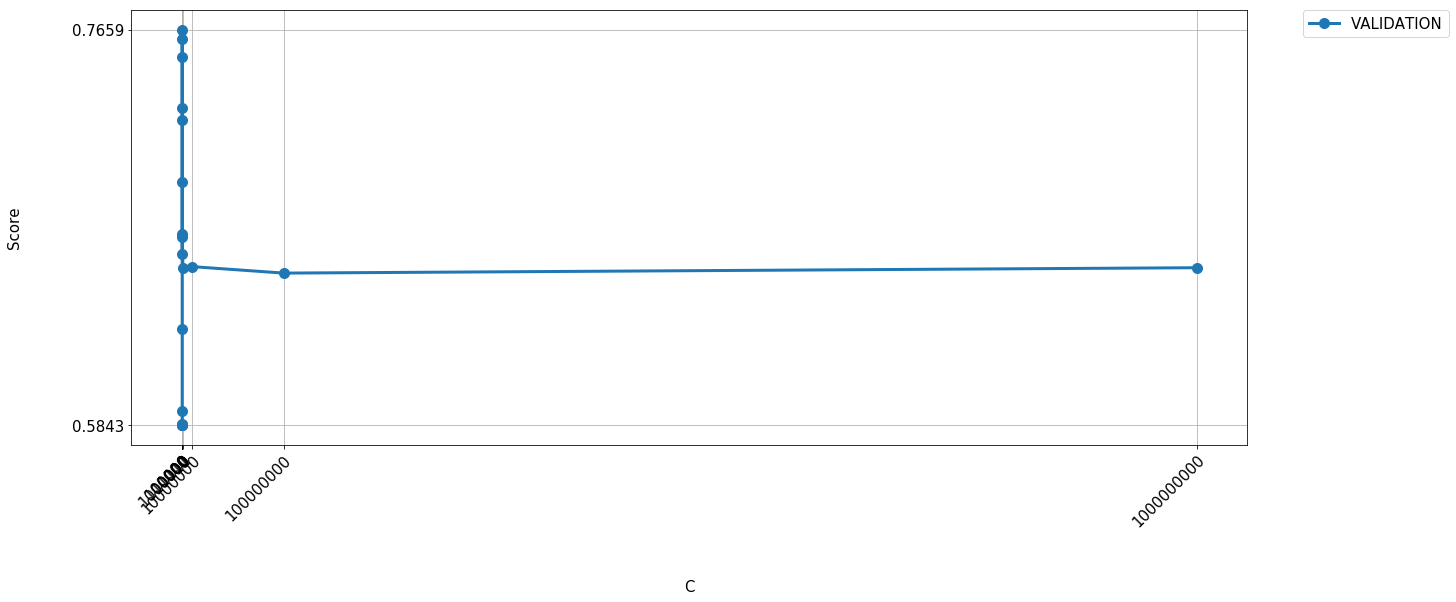

In [113]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1,score_v, label='VALIDATION',marker='o',markersize=10,linewidth=3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1, fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.grid()
plt.show()

As the difference is not so big between the lasts few "C" values, i have cut a few them apart for better visualization

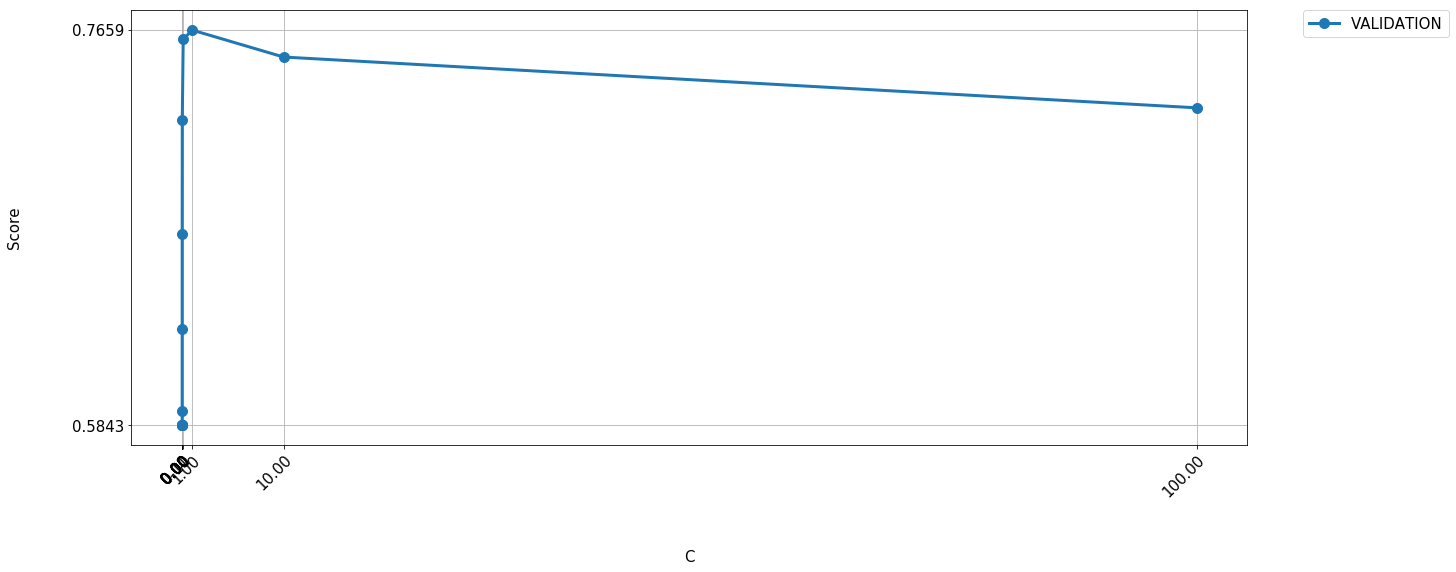

In [114]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1[:13],score_v[:13], label='VALIDATION',marker='o',markersize=10,linewidth=3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1[:13],fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.grid()
plt.show()

Cutting a few more just for visualization

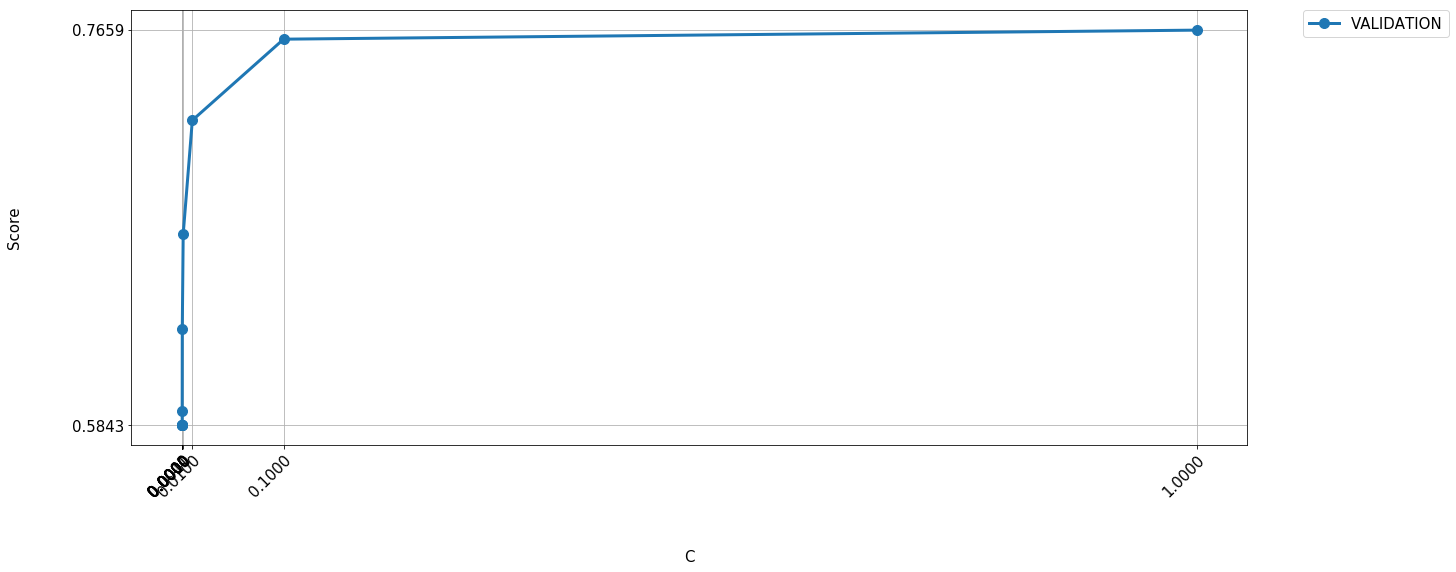

In [115]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1[:11],score_v[:11], label='VALIDATION',marker='o',markersize=10,linewidth=3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1[:11],fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.grid()
plt.show()

And this is how the score is with values below 1

In [116]:
C1=[]
score_v=[]
print("\t"*3+"VALIDATION:\n")
for c in np.linspace(0.0000000000001,1,20):
    lr=LogisticRegression(C=c)
    lr.fit(X_train,y_train)
    print ("C={:.5f}:\t\t{:.5f}".format
           (c,accuracy_score(y_val, lr.predict(X_val))))
    C1.append(c)
    score_v.append(accuracy_score(y_val, lr.predict(X_val)))

			VALIDATION:

C=0.00000:		0.58428
C=0.05263:		0.75264
C=0.10526:		0.76204
C=0.15789:		0.76490
C=0.21053:		0.76599
C=0.26316:		0.76688
C=0.31579:		0.76738
C=0.36842:		0.76708
C=0.42105:		0.76817
C=0.47368:		0.76846
C=0.52632:		0.76807
C=0.57895:		0.76826
C=0.63158:		0.76767
C=0.68421:		0.76728
C=0.73684:		0.76698
C=0.78947:		0.76747
C=0.84211:		0.76698
C=0.89474:		0.76708
C=0.94737:		0.76658
C=1.00000:		0.76589


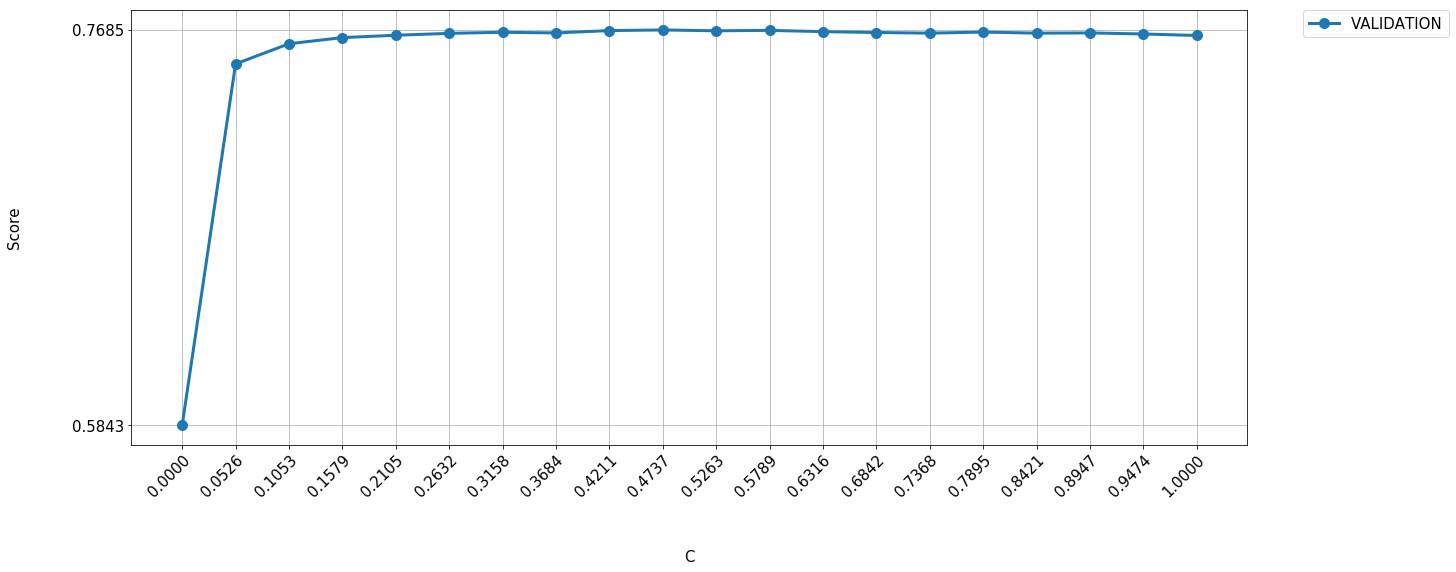

In [117]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1,score_v, label='VALIDATION',marker='o',markersize=10,linewidth=3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1,fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.grid()
plt.show()

The max value is:<br>
C=0.47368 -----> 0.76846<br>

Now I will validate those best parameters against our Test dataset

As this Dataset is balanced between 'Positives' and 'Negatives' texts<br>
I could use Accuracy as metric however...<br>
I want to use it to analyse in real time and, as we do not know if in the real world we are going to get a balanced dataset just like here, I am going to use F1-Score for my metric

In [118]:
final_model1 = LogisticRegression(C=C1[score_v.index(max(score_v))])
final_model1.fit(X_train, y_train)
print ("Final F1 Score: %s" 
       % f1_score(df_test['Sentiment'], final_model1.predict(X_test)))
print("Error: %s" % (1- f1_score(df_test['Sentiment'], final_model1.predict(X_test))))

Final F1 Score: 0.7767792954708843
Error: 0.2232207045291157


Let's try it in a few new text collected in real time from twitter

In [119]:
a=list(db_twetext.orm.select(t for t in db_twetext.Twetext))

In [120]:
b=list(i.twetext for i in a)

In [121]:
df = pd.DataFrame({
                    "Text":b
                  })

In [122]:
df.head()

,Text
0,"Aconteceu um negócio bem legal, de novo :P"
1,por incrivel q pareça...... eu gostei da music...
2,a musica da decada aqui https://t.co/hK4dnpUSm1
3,Madrugada + musica= eu triste
4,@Luan_xav1 @ayjoriedixx Musica braba


In [123]:
df[df["Text"].isnull()]

,Text


In [124]:
final_model1.predict(cv.transform(df["Text"]))

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1])

In [125]:
df['Sentiments'] = final_model1.predict(cv.transform(df["Text"]))

So, 3 people did the same work as this Model, how well our Model did compared to them

In [126]:
df_nik = pd.read_excel("sentiments - Musica.xlsx")
df_will = pd.read_excel("sentiments_WILL - Musica.xlsx")
df_ewerton = pd.read_excel("sentiments_EWERTON - Musica.xlsx")
df_nik.drop(["Unnamed: 0"],axis=1,inplace=True)
df_will.drop(["Unnamed: 0"],axis=1,inplace=True)
df_ewerton.drop(["Unnamed: 0"],axis=1,inplace=True)

Checking if there is any NaN value or skipped manual input from human side

In [127]:
df_nik[df_nik["Sentiments"].isnull()]

,Text,Sentiments


In [128]:
df_will[df_will["Sentiments"].isnull()]

,Text,Sentiments


In [129]:
df_ewerton[df_ewerton["Sentiments"].isnull()]

,Text,Sentiments


In [130]:
df_sentiments_table=pd.DataFrame({
    "Nik":df_nik["Sentiments"],
    "Will":df_will["Sentiments"],
    "Ewerton":df_ewerton["Sentiments"],
})

In [131]:
df_sentiments_table.head()

,Nik,Will,Ewerton
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,0


In [132]:
temp_list=[]
for i, row in df_sentiments_table.iterrows():
    c0=0
    c1=0
    if row['Nik'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Will'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Ewerton'] == 1:
        c1+=1
    else:
        c0+=1
    temp_list.append(0 if c0>c1 else 1)
df_sentiments_table["TT"] = temp_list


In [133]:
df_sentiments_table.head()

,Nik,Will,Ewerton,TT
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,0,1


In [134]:
f1_score(y_true=df_sentiments_table["TT"],y_pred=df["Sentiments"],average="macro")

0.5562342795544377

In [135]:
f1_score(y_true=df_nik["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.5924637681159419

In [136]:
f1_score(y_true=df_will["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.5758928571428571

In [137]:
f1_score(y_true=df_ewerton["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.44664492078285184

# With Tunning Study

<b>GridSearch + pipeline</b>

I am using a grid search to find the best parameters based on the train and test dataset

In [16]:
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk.corpus

stopwords_PT = nltk.corpus.stopwords.words('portuguese')

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lr',LogisticRegression()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df': (0.01, 0.05, 0.1,1),
    'vect__ngram_range': ((1, 1), (1, 2),(2, 2)),
    'vect__binary':(False,True),
    'vect__stop_words': [None,(stopwords_PT)],
    'lr__C': np.linspace(0.0000000000001,1,20),
}

grid_search=GridSearchCV(pipeline,parameters,cv=3,scoring="f1_macro",verbose = 1, n_jobs =-1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
#print("parameters:")
#pprint(parameters)
t0 = time()
grid_search.fit(df_train['Text'],df_train['Sentiment'])
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Performing grid search...
pipeline: ['vect', 'lr']
Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 56.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 68.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 81.5min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 96.0min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 98.4min finished
/home/nikolas/anaconda3/lib/python3.

done in 5907.580s

Best score: 0.766
Best parameters set:
	lr__C: 0.5789473684210947
	vect__binary: True
	vect__max_df: 0.5
	vect__min_df: 1
	vect__ngram_range: (1, 2)
	vect__stop_words: None


In [138]:
from sklearn.feature_extraction.text import CountVectorizer

cv_ngram = CountVectorizer(binary=True,max_df=0.5,min_df=1,ngram_range=(1,2),stop_words=None)
cv_ngram.fit(df_train['Text'])
X = cv_ngram.transform(df_train['Text'])
X_test = cv_ngram.transform(df_test['Text'])

Now I will validate those best parameters against our Test dataset

In [139]:
final_model3 = LogisticRegression(C=best_parameters['lr__C'])
final_model3.fit(X, df_train['Sentiment'])
print("BEST ESTIMATOR WITH PIPELINE")
print ("Final F1_Score: %s" 
       % f1_score(df_test['Sentiment'], final_model3.predict(X_test)))
print("Error: %s" % (1- f1_score(df_test['Sentiment'], final_model3.predict(X_test))))

BEST ESTIMATOR WITH PIPELINE
Final F1_Score: 0.7916928886091882
Error: 0.20830711139081182


Let's try it in the same DF as before

In [140]:
a=list(db_twetext.orm.select(t for t in db_twetext.Twetext))

In [141]:
b=list(i.twetext for i in a)

In [142]:
df = pd.DataFrame({
                    "Text":b
                  })

In [143]:
df.head()

,Text
0,"Aconteceu um negócio bem legal, de novo :P"
1,por incrivel q pareça...... eu gostei da music...
2,a musica da decada aqui https://t.co/hK4dnpUSm1
3,Madrugada + musica= eu triste
4,@Luan_xav1 @ayjoriedixx Musica braba


In [144]:
final_model3.predict(cv_ngram.transform(df["Text"]))

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [145]:
df['Sentiments'] = final_model3.predict(cv_ngram.transform(df["Text"]))

So, 3 people did the same work as this Model, how well our Model did compared to them

In [146]:
df_nik = pd.read_excel("sentiments - Musica.xlsx")
df_will = pd.read_excel("sentiments_WILL - Musica.xlsx")
df_ewerton = pd.read_excel("sentiments_EWERTON - Musica.xlsx")
df_nik.drop(["Unnamed: 0"],axis=1,inplace=True)
df_will.drop(["Unnamed: 0"],axis=1,inplace=True)
df_ewerton.drop(["Unnamed: 0"],axis=1,inplace=True)

Checking if there is any NaN value or skipped manual input from human side

In [147]:
df_nik[df_nik["Sentiments"].isnull()]

,Text,Sentiments


In [148]:
df_will[df_will["Sentiments"].isnull()]

,Text,Sentiments


In [149]:
df_ewerton[df_ewerton["Sentiments"].isnull()]

,Text,Sentiments


In [150]:
df_sentiments_table=pd.DataFrame({
    "Nik":df_nik["Sentiments"],
    "Will":df_will["Sentiments"],
    "Ewerton":df_ewerton["Sentiments"],
})

In [151]:
df_sentiments_table.head()

,Nik,Will,Ewerton
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,0


In [152]:
temp_list=[]
for i, row in df_sentiments_table.iterrows():
    c0=0
    c1=0
    if row['Nik'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Will'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Ewerton'] == 1:
        c1+=1
    else:
        c0+=1
    temp_list.append(0 if c0>c1 else 1)
df_sentiments_table["TT"] = temp_list


In [153]:
df_sentiments_table.head()

,Nik,Will,Ewerton,TT
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,0,1


In [154]:
f1_score(y_true=df_sentiments_table["TT"],y_pred=df["Sentiments"],average="macro")

0.525

In [155]:
f1_score(y_true=df_nik["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.6052631578947368

In [156]:
f1_score(y_true=df_will["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.5206153846153846

In [157]:
f1_score(y_true=df_ewerton["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.43826086956521737

# Dumping model into pickles

In [24]:
pickle.dump(final_model3, open("./our_model.pkl", "wb"))
pickle.dump(cv_ngram, open("./our_cv.pkl", "wb"))